<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Sampling/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import pandas as pd
data = pd.read_csv("/content/Creditcard_data.csv")

In [208]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [209]:
data.Class.value_counts()

0    763
1      9
Name: Class, dtype: int64

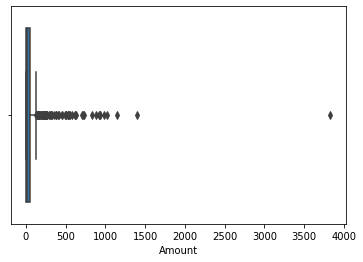

In [210]:
import seaborn as sns
sns.boxplot(data.Amount)

In [211]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [212]:
import warnings
warnings.filterwarnings("ignore")

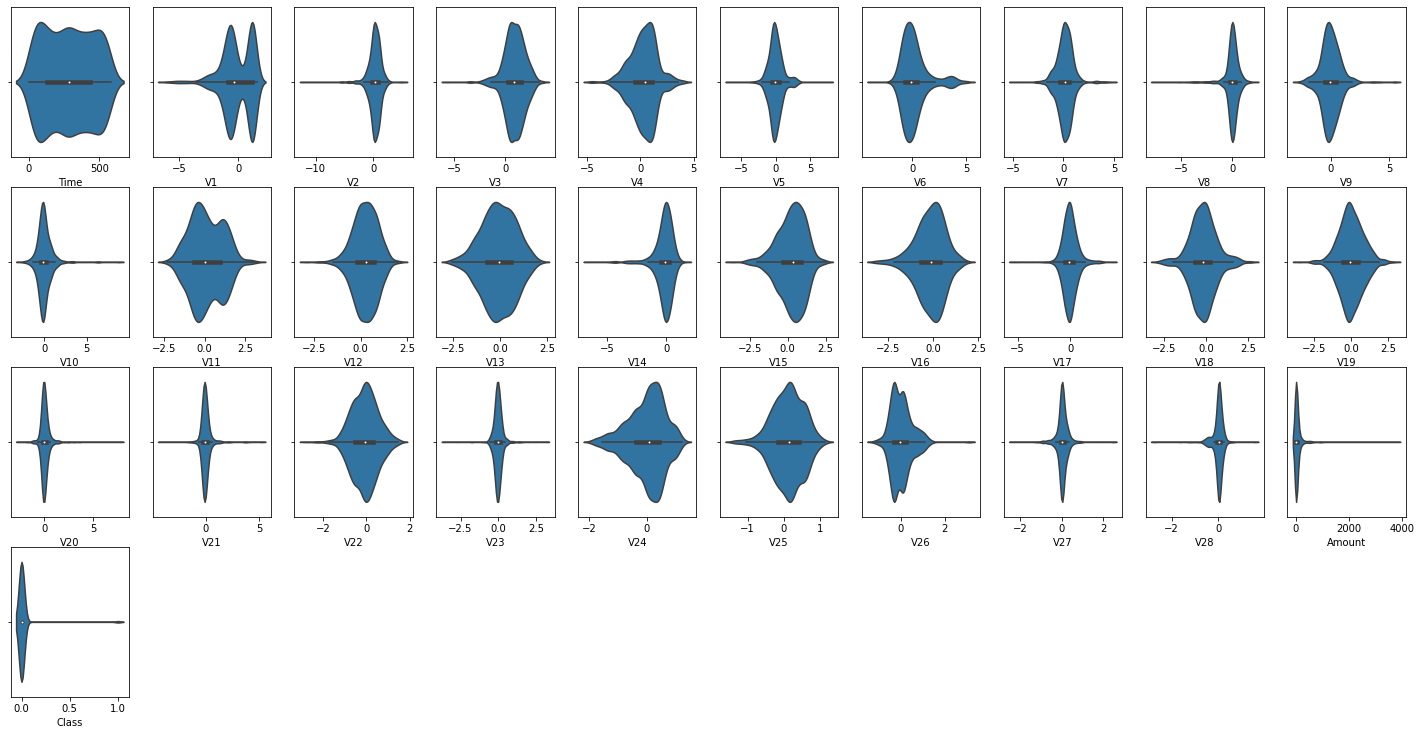

In [213]:
import matplotlib.pyplot as plt
itr  = 1
plt.subplots(figsize = (25,16))
for x in data.columns:
  plt.subplot(5,10,itr);
  itr=itr+1
  temp = data[x]
  sns.violinplot(temp);

In [214]:
data = data[data.Amount<2000]

In [215]:
X = data.drop('Class', axis=1)
Y = data['Class']

In [216]:
%pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [217]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state =0)

x_rus, y_rus = rus.fit_resample(X,Y)

In [218]:
from collections import Counter
print("Before Over Sampling :" , Counter(Y))
print("After Over Sampling :" , Counter(y_rus))

Before Over Sampling : Counter({0: 762, 1: 9})
After Over Sampling : Counter({0: 762, 1: 762})


In [219]:
import numpy as np
from scipy.stats import norm
# Calculation of sample size using sample size detection formula
p = np.sum(y_rus) / len(y_rus)

# Set the confidence level and margin of error
confidence_level = input("Enter the Confidence Level(in %) :")  
confidence_level = float(confidence_level)/100

alpha = 1-confidence_level
print("The Margin of Error :",alpha)

z_score = norm.ppf(1-alpha/2)
print("Z-Score is :",z_score)

n = int(np.ceil((z_score**2 * p * (1-p)) / (alpha**2)))
print("Sample Size is :",n)

Enter the Confidence Level(in %) :94
The Margin of Error : 0.06000000000000005
Z-Score is : 1.8807936081512509
Sample Size is : 246


In [220]:
balanced_df = pd.concat([x_rus, y_rus], axis=1)
balanced_df.to_csv('balanced_dataset.csv', index=False)
print("Balanced Dataset Created...")

Balanced Dataset Created...


In [221]:
sample_datasets = []

# 1. Simple Random Sampling
sample0 = balanced_df.sample(n, replace=False)
sample_datasets.append(sample0)

# 2. Stratified Sampling
sample1=balanced_df.groupby('Class',group_keys=False).apply(lambda x: x.sample(frac=.2523))
sample_datasets.append(sample1)


# 3. systematic Sampling
sampling_interval = int(len(balanced_df) / n) # Sample every 10th row

In [222]:
# Create a list of indices to sample
indices = np.arange(start=0, stop=len(balanced_df), step=sampling_interval)[:n]

# Sample the dataset using the indices
sample2 = balanced_df.iloc[indices]
sample_datasets.append(sample2)

In [223]:
# 4. Cluster Sampling
from sklearn.cluster import KMeans
# Separate the data into two clusters based on the class column
kmeans = KMeans(n_clusters=2, random_state=0).fit(balanced_df.iloc[:, :-1])
clusters = kmeans.predict(balanced_df.iloc[:, :-1])
balanced_df['cluster'] = clusters

# Calculate the proportion of each cluster in the data
proportions = balanced_df['cluster'].value_counts(normalize=True)

# Set the desired sample size and calculate the number of samples to take from each cluster
desired_sample_size = n
sample_sizes = np.round(proportions * n).astype(int)

# Initialize an empty list to store the sampled data
sample3 = []

# Iterate over each cluster and take a random sample of the appropriate size
for cluster, size in sample_sizes.iteritems():
    cluster_data = balanced_df[balanced_df['cluster'] == cluster]
    sample = cluster_data.sample(n=size, random_state=0)
    sample3.append(sample)

# Concatenate the sampled data into a single DataFrame
sample3 = pd.concat(sample3)

# Remove the cluster column from the sampled data
sample3 = sample3.drop('cluster', axis=1)
sample_datasets.append(sample3)

In [224]:
# 5. convenience Sampling
# Separate the 0 and 1 class observations into two separate dataframes and Conducting convenience sampling by selecting n/2 observations from each class
zeros_df = balanced_df[balanced_df['Class'] == 0].sample(int(n/2), random_state=1)
ones_df = balanced_df[balanced_df['Class'] == 1].sample(int(n/2), random_state=1)

# Combine the sampled dataframes into a new balanced dataset
sample4 = pd.concat([zeros_df, ones_df])
sample_datasets.append(sample4)

In [225]:
for i, sample in enumerate(sample_datasets):
    sample.to_csv(f'sample_dataset_{i}.csv', index=False)

In [226]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = [
    Pipeline([('scaler', StandardScaler()),('lr', LogisticRegression(max_iter=1000))]),
    GaussianNB(),RandomForestClassifier(n_estimators=2, random_state=42), SVC(), KNeighborsClassifier()]

# Define a list of model names for the table
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVC', 'KNN']

# Define a table to store the results
results_table = pd.DataFrame(columns=['Dataset', *model_names])

# Loop over each sample dataset and each model to compute accuracy
for i, sample in enumerate(sample_datasets):
    X = sample.iloc[:, :-1]
    y = sample.iloc[:, -1]
    row = {'Dataset': f'Sampling {i+1}'}
    for j, model in enumerate(models):
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        row[model_names[j]] = f'{accuracy:.3f}'
    results_table = results_table.append(row, ignore_index=True)

# Transpose the table so that the model names are in the first column and dataset names are in the top row
results_table = results_table.set_index('Dataset').T.rename_axis('Model', axis=0)

results_table

Dataset,Sampling 1,Sampling 2,Sampling 3,Sampling 4,Sampling 5
Model,,,,,
Logistic Regression,0.947,0.878,0.878,0.963,1.000
Naive Bayes,0.642,0.706,0.683,0.687,0.919
Random Forest,1.000,1.000,0.992,1.000,0.972
SVC,0.736,0.755,0.667,0.654,0.992
KNN,0.951,0.964,0.947,0.931,0.988


In [227]:
results_table

Dataset,Sampling 1,Sampling 2,Sampling 3,Sampling 4,Sampling 5
Model,,,,,
Logistic Regression,0.947,0.878,0.878,0.963,1.000
Naive Bayes,0.642,0.706,0.683,0.687,0.919
Random Forest,1.000,1.000,0.992,1.000,0.972
SVC,0.736,0.755,0.667,0.654,0.992
KNN,0.951,0.964,0.947,0.931,0.988


In [228]:
# Applying MCDM using TOPSIS to find the best model
import pandas as pd
import numpy as np
from sklearn import preprocessing
# names = data.iloc[:, 0].values
criteria = results_table.iloc[:, 0:].values
weights = [1, 1, 1, 1, 1]
ideal = np.max(normalized_criteria, axis=0)
anti_ideal = np.min(normalized_criteria, axis=0)
s_plus = np.sqrt(np.sum((normalized_criteria - ideal)**2, axis=1))
s_minus = np.sqrt(np.sum((normalized_criteria - anti_ideal)**2, axis=1))
topsis_score = s_plus / (s_plus + s_minus)
results_table['TOPSIS Score'] = topsis_score
results_table = results_table.sort_values(by='TOPSIS Score', ascending=False)

In [229]:
results_table

Dataset,Sampling 1,Sampling 2,Sampling 3,Sampling 4,Sampling 5,TOPSIS Score
Model,,,,,,
Random Forest,1.000,1.000,0.992,1.000,0.972,0.617455
KNN,0.951,0.964,0.947,0.931,0.988,0.600798
Logistic Regression,0.947,0.878,0.878,0.963,1.000,0.581657
Naive Bayes,0.642,0.706,0.683,0.687,0.919,0.405832
SVC,0.736,0.755,0.667,0.654,0.992,0.390095


In [230]:
results_table.to_csv(f'Final_Solution.csv', index=False)